In [27]:

#cargamos las bibliotecas a utilizar y asignamos nombres cortos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates


In [28]:
df0=pd.read_excel('meteo.xlsx')

In [29]:
df0.head()

,DATE,TIME,N,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2009-01-01,00:10:00,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,00:20:00,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,00:30:00,1.0,NaN,1.227,0.685,-0.069,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,00:40:00,1.0,NaN,1.135,0.741,-0.093,9.80,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,00:50:00,1.0,NaN,0.755,1.064,-0.149,8.87,1.332,-184.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#df=df0(["DATE", "TIME", "Unnamed: 2", "u_Avg","v_Avg", "w_Avg", "t_Avg", "kh20_Avg", "net_rad_Avg", "shf1_Avg","shf2_Avg", "vv_Avg", "airT_Avg", "rh_Avg", "e_sat_Avg", "e_Avg", "h2o_hmp_Avg"])

df=df0.drop(df0.columns[df0.columns.str.contains('unnamed:',case = False)],axis = 1)
df.dtypes

DATE           datetime64[ns]
TIME                   object
N                     float64
u_Avg                 float64
v_Avg                  object
w_Avg                 float64
t_Avg                 float64
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
dtype: object

In [31]:
cols=["N", "u_Avg","v_Avg", "w_Avg", "t_Avg", "kh20_Avg", "net_rad_Avg", "shf1_Avg","shf2_Avg", "vv_Avg", "airT_Avg", "rh_Avg", "e_sat_Avg", "e_Avg", "h2o_hmp_Avg"]
for col in cols:
    df[col]=df[col].astype(dtype=np.float64)
#df["TIME"]=pd.to_datetime(df("TIME"))
df.dtypes

DATE           datetime64[ns]
TIME                   object
N                     float64
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
dtype: object

In [32]:
df.head()

,DATE,TIME,N,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,2009-01-01,00:10:00,1.0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000
1,2009-01-01,00:20:00,1.0,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000
2,2009-01-01,00:30:00,1.0,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
3,2009-01-01,00:40:00,1.0,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000
4,2009-01-01,00:50:00,1.0,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000


In [34]:
df.corr()

,N,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
N,1.000000,0.020629,0.031793,0.540191,0.023786,-0.000075,-0.132426,-0.006994,-0.003209,0.463299,-0.268578,0.357670,-0.162738,0.387780,0.768532
u_Avg,0.020629,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.031793,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.540191,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.023786,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.000075,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.132426,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,-0.006994,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,-0.003209,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,0.463299,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064


In [35]:
df1=df.corr()

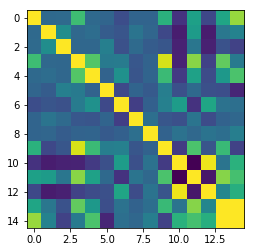

In [36]:
plt.imshow(df1)

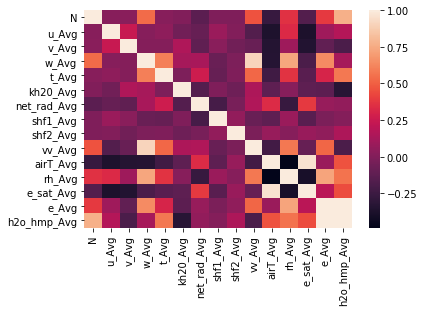

In [37]:
sns.heatmap(df1)

In [40]:
df1


,N,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
N,1.000000,0.020629,0.031793,0.540191,0.023786,-0.000075,-0.132426,-0.006994,-0.003209,0.463299,-0.268578,0.357670,-0.162738,0.387780,0.768532
u_Avg,0.020629,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.031793,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.540191,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.023786,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.000075,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.132426,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,-0.006994,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,-0.003209,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,0.463299,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064


Text(0.5, 1.0, 'N vs w_Avg (corr=0.54)')

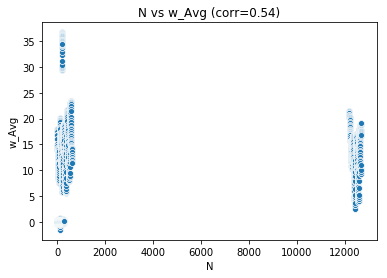

In [48]:
sns.scatterplot(x=df["N"], y= df["w_Avg"])
plt.title("N vs w_Avg (corr=0.54)")

Text(0.5, 1.0, 'N vs h2o_hmp_Avg (corr=0.768)')

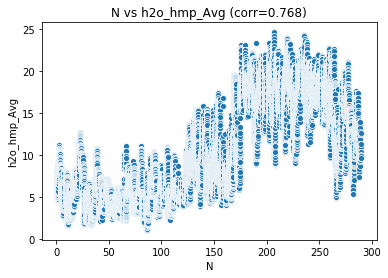

In [53]:
sns.scatterplot(x=df["N"], y= df["h2o_hmp_Avg"])
plt.title("N vs h2o_hmp_Avg (corr=0.768)")

Text(0.5, 1.0, 'w_Avg vs t_Avg (corr=0.601)')

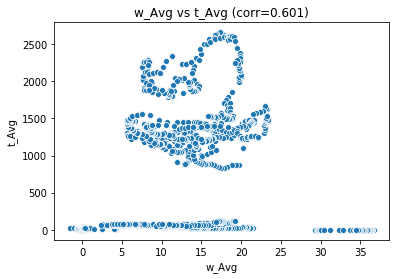

In [54]:
sns.scatterplot(x=df["w_Avg"], y= df["t_Avg"])
plt.title("w_Avg vs t_Avg (corr=0.601)")

Text(0.5, 1.0, 'w_Avg vs rh_Avg (corr=0.737)')

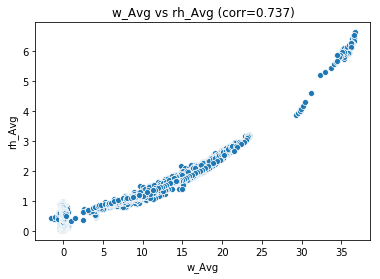

In [57]:
sns.scatterplot(x=df["w_Avg"], y= df["rh_Avg"])
plt.title("w_Avg vs rh_Avg (corr=0.737)")

Text(0.5, 1.0, 'w_Avg vs vv_Avg (corr=0.912)')

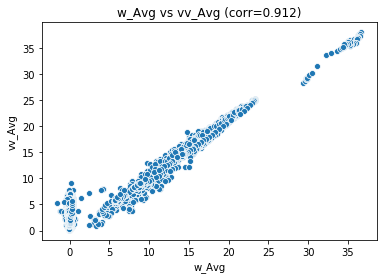

In [62]:
sns.scatterplot(x=df["w_Avg"], y= df["vv_Avg"])
plt.title("w_Avg vs vv_Avg (corr=0.912)")

Text(0.5, 1.0, 'w_Avg vs t_Avg (corr=0.646)')

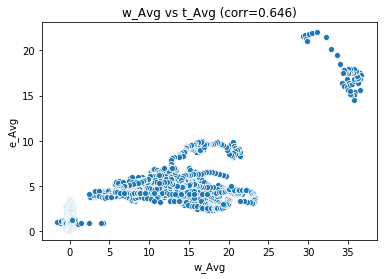

In [59]:
sns.scatterplot(x=df["w_Avg"], y= df["e_Avg"])
plt.title("w_Avg vs t_Avg (corr=0.646)")

Text(0.5, 1.0, 't_Avg vs vv_Avg (corr=0.529)')

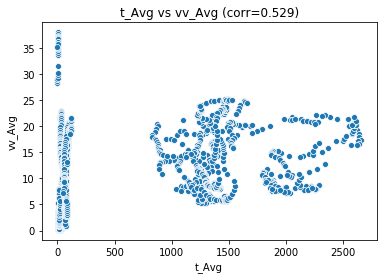

In [60]:
sns.scatterplot(x=df["t_Avg"], y= df["vv_Avg"])
plt.title("t_Avg vs vv_Avg (corr=0.529)")

Text(0.5, 1.0, 't_Avg vs h2o_hmp_Avg (corr=0.576)')

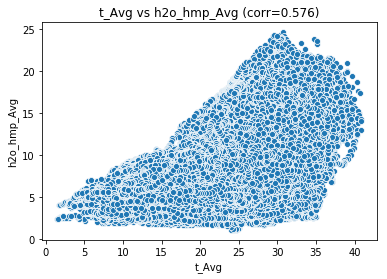

In [61]:
sns.scatterplot(x=df["t_Avg"], y= df["h2o_hmp_Avg"])
plt.title("t_Avg vs h2o_hmp_Avg (corr=0.576)")

Text(0.5, 1.0, 'vv_Avg vs e_Avg (corr=0.521)')

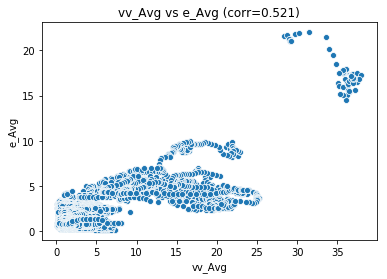

In [65]:
sns.scatterplot(x=df["vv_Avg"], y= df["e_Avg"])
plt.title("vv_Avg vs e_Avg (corr=0.521)")

Text(0.5, 1.0, 'vv_Avg vs rh_Avg (corr=0.582)')

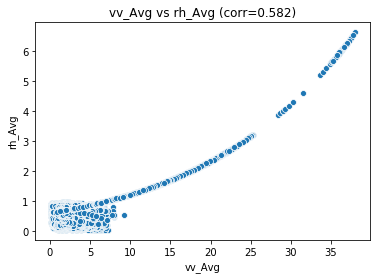

In [66]:
sns.scatterplot(x=df["vv_Avg"], y= df["rh_Avg"])
plt.title("vv_Avg vs rh_Avg (corr=0.582)")

Text(0.5, 1.0, 'airT_Avg vs e_sat_Avg (corr=0.964)')

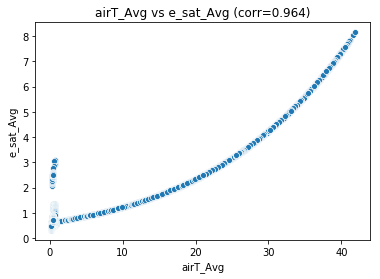

In [67]:
sns.scatterplot(x=df["airT_Avg"], y= df["e_sat_Avg"])
plt.title("airT_Avg vs e_sat_Avg (corr=0.964)")

Text(0.5, 1.0, 'rh_Avg vs e_Avg (corr=0.728)')

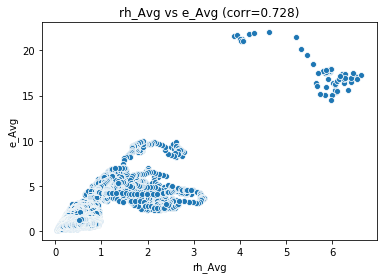

In [69]:
sns.scatterplot(x=df["rh_Avg"], y= df["e_Avg"])
plt.title("rh_Avg vs e_Avg (corr=0.728)")

Text(0.5, 1.0, 'rh_Avg vs h2o_hmp_Avg (corr=0.563)')

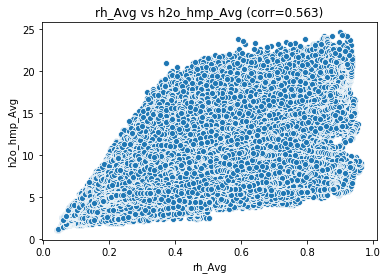

In [70]:
sns.scatterplot(x=df["rh_Avg"], y= df["h2o_hmp_Avg"])
plt.title("rh_Avg vs h2o_hmp_Avg (corr=0.563)")

Text(0.5, 1.0, 'e_Avg vs h2o_hmp_Avg (corr=0.999)')

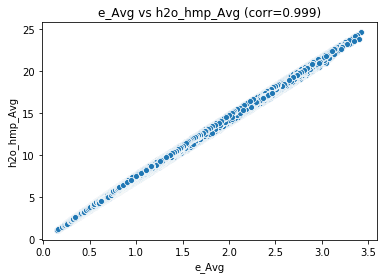

In [71]:
sns.scatterplot(x=df["e_Avg"], y= df["h2o_hmp_Avg"])
plt.title("e_Avg vs h2o_hmp_Avg (corr=0.999)")